# Thinking in tensors

A hands-on training  by [Piotr Migdał](https://p.migdal.pl) (2019)


## Extra notebook: Operation playground 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

## What is a neuron

In [3]:
x_in = torch.tensor([0.5, -1., 3.])
A_single = torch.tensor([[1.], [1.], [0.]])

In [5]:
x_in.matmul(A_single)

tensor([-0.5000])

In [6]:
A_layer = torch.tensor([[1., 0.2], [1., 0.5], [0., -.1]])
x_in.matmul(A_layer)

tensor([-0.5000, -0.7000])

In [7]:
A_layer_2 = torch.tensor([[1.], [-1.]])

In [8]:
x_in.matmul(A_layer).matmul(A_layer_2)

tensor([0.2000])

In [9]:
x_in.matmul(A_layer).sigmoid().matmul(A_layer_2).sigmoid()

tensor([0.5114])

In [10]:
z = torch.tensor([0.5, -2., 1.5])

In [12]:
z.max(dim=0)

(tensor(1.5000), tensor(2))

In [14]:
z.exp() / z.exp().sum()

tensor([0.2631, 0.0216, 0.7153])

In [15]:
F.softmax(z, dim=0)

tensor([0.2631, 0.0216, 0.7153])

And now, with `torch.nn` module.

In [16]:
x = torch.randn(2, 1, 4, 4)
x

tensor([[[[-0.4769,  0.9649,  0.2862,  0.9352],
          [-1.0658, -0.7420, -0.6432, -1.0337],
          [-0.7172,  1.0769,  1.2858,  0.1496],
          [ 0.1149, -0.3891,  0.5113, -0.8105]]],


        [[[ 0.2784,  1.0272, -0.9411,  1.1669],
          [-0.2463,  0.6799, -1.3384,  0.1237],
          [ 0.5660, -0.9319, -1.5056, -0.6326],
          [-0.5619, -0.0836, -0.8017,  1.1799]]]])

## Flatten

In [17]:
x.view(x.size(0), -1)

tensor([[-0.4769,  0.9649,  0.2862,  0.9352, -1.0658, -0.7420, -0.6432, -1.0337,
         -0.7172,  1.0769,  1.2858,  0.1496,  0.1149, -0.3891,  0.5113, -0.8105],
        [ 0.2784,  1.0272, -0.9411,  1.1669, -0.2463,  0.6799, -1.3384,  0.1237,
          0.5660, -0.9319, -1.5056, -0.6326, -0.5619, -0.0836, -0.8017,  1.1799]])

## Activation functions

* Element-wise

In [18]:
x.relu()

tensor([[[[0.0000, 0.9649, 0.2862, 0.9352],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0769, 1.2858, 0.1496],
          [0.1149, 0.0000, 0.5113, 0.0000]]],


        [[[0.2784, 1.0272, 0.0000, 1.1669],
          [0.0000, 0.6799, 0.0000, 0.1237],
          [0.5660, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.1799]]]])

In [19]:
F.relu(x)

tensor([[[[0.0000, 0.9649, 0.2862, 0.9352],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0769, 1.2858, 0.1496],
          [0.1149, 0.0000, 0.5113, 0.0000]]],


        [[[0.2784, 1.0272, 0.0000, 1.1669],
          [0.0000, 0.6799, 0.0000, 0.1237],
          [0.5660, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.1799]]]])

In [20]:
relu = nn.ReLU()
relu(x)

tensor([[[[0.0000, 0.9649, 0.2862, 0.9352],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0769, 1.2858, 0.1496],
          [0.1149, 0.0000, 0.5113, 0.0000]]],


        [[[0.2784, 1.0272, 0.0000, 1.1669],
          [0.0000, 0.6799, 0.0000, 0.1237],
          [0.5660, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.1799]]]])

In [21]:
X = torch.arange(-3, 3, step=0.2)

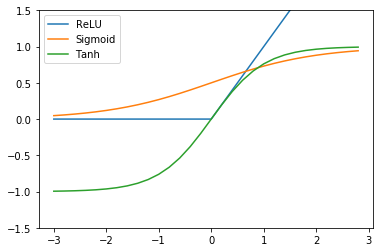

In [22]:
plt.plot(X.numpy(), X.relu().numpy(), label="ReLU")
plt.plot(X.numpy(), X.sigmoid().numpy(), label="Sigmoid")
plt.plot(X.numpy(), X.tanh().numpy(), label="Tanh")
plt.ylim([-1.5, 1.5])
plt.legend()

## Pooling operation

In [24]:
x

tensor([[[[-0.4769,  0.9649,  0.2862,  0.9352],
          [-1.0658, -0.7420, -0.6432, -1.0337],
          [-0.7172,  1.0769,  1.2858,  0.1496],
          [ 0.1149, -0.3891,  0.5113, -0.8105]]],


        [[[ 0.2784,  1.0272, -0.9411,  1.1669],
          [-0.2463,  0.6799, -1.3384,  0.1237],
          [ 0.5660, -0.9319, -1.5056, -0.6326],
          [-0.5619, -0.0836, -0.8017,  1.1799]]]])

In [23]:
maxpool = nn.MaxPool2d((2, 2))
maxpool(x)

tensor([[[[0.9649, 0.9352],
          [1.0769, 1.2858]]],


        [[[1.0272, 1.1669],
          [0.5660, 1.1799]]]])

In [25]:
avgpool = nn.AvgPool2d((2, 2))
avgpool(x)

tensor([[[[-0.3300, -0.1139],
          [ 0.0214,  0.2840]]],


        [[[ 0.4348, -0.2472],
          [-0.2528, -0.4400]]]])

## Convolutions

In [26]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conv(x)

tensor([[[[-0.1205,  0.3944],
          [ 0.0101, -0.9426]]],


        [[[-0.8160, -0.6141],
          [-1.5594, -0.0049]]]], grad_fn=<MkldnnConvolutionBackward>)

In [28]:
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
conv(x)

tensor([[[[ 0.1028,  0.3170, -0.0228,  0.2994],
          [ 0.5193,  0.5356,  0.7956,  0.5221],
          [-0.5471, -0.3436, -0.2453,  0.0140],
          [ 0.4891,  0.6727,  0.8158,  0.0926]],

         [[ 0.2662,  0.3773,  0.2300,  0.5992],
          [ 0.6742,  0.2845, -0.3790, -0.1358],
          [ 0.2574,  0.7301,  0.3012,  0.6628],
          [ 0.2863,  0.1074, -0.0549,  0.0350]]],


        [[[-0.1433,  0.6171, -0.1303,  0.2843],
          [ 0.3996,  0.9865,  0.2698,  0.6738],
          [ 0.7464,  0.4818,  0.0997,  0.3126],
          [ 0.1084, -0.1064, -0.6209,  0.3206]],

         [[ 0.4634, -0.1536,  0.4951,  0.3673],
          [-0.2502, -0.0347,  0.4041,  0.4971],
          [ 0.3915,  0.1892,  0.7469,  0.1638],
          [ 0.2230,  0.3886,  0.5597,  0.5635]]]],
       grad_fn=<MkldnnConvolutionBackward>)

In [29]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, padding=1)
conv(x)

tensor([[[[ 0.7881,  0.7881,  0.7881,  0.7881,  0.7881,  0.7881],
          [ 0.7881,  0.5062,  1.3585,  0.9573,  1.3409,  0.7881],
          [ 0.7881,  0.1581,  0.3495,  0.4079,  0.1771,  0.7881],
          [ 0.7881,  0.3642,  1.4247,  1.5481,  0.8765,  0.7881],
          [ 0.7881,  0.8561,  0.5582,  1.0904,  0.3091,  0.7881],
          [ 0.7881,  0.7881,  0.7881,  0.7881,  0.7881,  0.7881]]],


        [[[ 0.7881,  0.7881,  0.7881,  0.7881,  0.7881,  0.7881],
          [ 0.7881,  0.9527,  1.3953,  0.2318,  1.4779,  0.7881],
          [ 0.7881,  0.6425,  1.1900, -0.0030,  0.8612,  0.7881],
          [ 0.7881,  1.1227,  0.2373, -0.1018,  0.4142,  0.7881],
          [ 0.7881,  0.4560,  0.7387,  0.3142,  1.4856,  0.7881],
          [ 0.7881,  0.7881,  0.7881,  0.7881,  0.7881,  0.7881]]]],
       grad_fn=<MkldnnConvolutionBackward>)

## Dropout

During the training phase it "switches off" randomly a fraction of neurons. This prevents network from relaying only on a few neurons.S

See:
* [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf)
* [torch.nn.Dropout](https://pytorch.org/docs/stable/nn.html#dropout-layers)

In [30]:
dropout = nn.Dropout(p=0.5)

In [33]:
dropout(x)

tensor([[[[-0.9539,  0.0000,  0.5724,  1.8704],
          [-2.1316, -0.0000, -0.0000, -2.0674],
          [-0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.7781,  0.0000, -0.0000]]],


        [[[ 0.0000,  2.0543, -0.0000,  0.0000],
          [-0.4926,  1.3598, -0.0000,  0.0000],
          [ 1.1320, -0.0000, -0.0000, -0.0000],
          [-1.1238, -0.0000, -1.6035,  0.0000]]]])

In [34]:
dropout.eval()

Dropout(p=0.5)

In [35]:
dropout(x)

tensor([[[[-0.4769,  0.9649,  0.2862,  0.9352],
          [-1.0658, -0.7420, -0.6432, -1.0337],
          [-0.7172,  1.0769,  1.2858,  0.1496],
          [ 0.1149, -0.3891,  0.5113, -0.8105]]],


        [[[ 0.2784,  1.0272, -0.9411,  1.1669],
          [-0.2463,  0.6799, -1.3384,  0.1237],
          [ 0.5660, -0.9319, -1.5056, -0.6326],
          [-0.5619, -0.0836, -0.8017,  1.1799]]]])

## Batch norm

In [36]:
bn = nn.BatchNorm2d(num_features=1)

In [37]:
bn(x)

tensor([[[[-0.0286,  0.0755,  0.0265,  0.0733],
          [-0.0711, -0.0478, -0.0406, -0.0688],
          [-0.0460,  0.0836,  0.0986,  0.0166],
          [ 0.0141, -0.0223,  0.0427, -0.0527]]],


        [[[ 0.0259,  0.0800, -0.0621,  0.0901],
          [-0.0120,  0.0549, -0.0908,  0.0147],
          [ 0.0467, -0.0615, -0.1029, -0.0399],
          [-0.0348, -0.0002, -0.0521,  0.0910]]]],
       grad_fn=<NativeBatchNormBackward>)

In [40]:
bn(x[:1])

tensor([[[[-0.0336,  0.0759,  0.0243,  0.0736],
          [-0.0783, -0.0537, -0.0462, -0.0758],
          [-0.0518,  0.0844,  0.1002,  0.0140],
          [ 0.0114, -0.0269,  0.0414, -0.0589]]]],
       grad_fn=<NativeBatchNormBackward>)

In [39]:
bn(x[:1]).mean(dim=[2, 3])

tensor([[2.3283e-10]], grad_fn=<MeanBackward0>)

## Softmax